<a href="https://colab.research.google.com/github/Gio-Choi/Stock_Regime_Analysis/blob/main/3mos_FSI_MLPcross.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/FSI_Analysis/FSI_Macro.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df = df.drop(columns = ['Unnamed: 0','Date','^GSPC','S&P_UD','MAX','CMAX','Yt','Rank','FSI','FSI_pct'])
df

,VIXCLS,CPIAUCSL,M2SL,FEDFUNDS,T10Y2Y,AAA,UNRATE,PCUOMFGOMFG,USPHCI,IQ,FSI_UD
0,14.09,193.700,6455.9,2.79,0.71,5.33,5.2,149.6,93.93,106.9,0.0
1,15.12,193.600,6473.3,3.00,0.57,5.15,5.1,149.4,94.18,106.7,0.0
2,12.36,193.700,6505.8,3.04,0.41,4.96,5.0,149.6,94.46,106.7,1.0
3,11.40,194.900,6537.4,3.26,0.30,5.06,5.0,151.0,94.73,106.8,0.0
4,12.08,196.100,6570.2,3.50,0.28,5.09,4.9,151.8,94.98,106.6,1.0
...,...,...,...,...,...,...,...,...,...,...,...
184,24.28,259.580,18357.4,0.10,0.45,2.25,8.4,193.0,121.22,122.1,1.0
185,26.12,260.190,18575.2,0.09,0.55,2.31,7.9,192.9,121.97,122.8,0.0
186,26.70,260.352,18735.7,0.09,0.54,2.35,6.9,193.7,122.93,123.0,0.0
187,37.13,260.721,18969.8,0.09,0.71,2.30,6.7,194.5,123.40,124.0,0.0


In [5]:
names = df.columns.tolist()
names.pop()
names

['VIXCLS',
 'CPIAUCSL',
 'M2SL',
 'FEDFUNDS',
 'T10Y2Y',
 'AAA',
 'UNRATE',
 'PCUOMFGOMFG',
 'USPHCI',
 'IQ']

In [6]:
new_df = pd.DataFrame()

# Iterate over each row in the original dataframe
for i in range(2, len(df)):
    # Get the current y value
    y = df.iloc[i][-1]

    # Get the x features for the past 3 time steps
    x_features = df.iloc[i-2:i+1, :-1].values.flatten()

    # Create a dictionary with the data for the current row
    row_data = {'y': y}
    for j, feature in enumerate(x_features):
      m = j%10
      name = names[m]
      row_data[f'{name}{(j//10)+1}'] = feature

    # Append the row to the new dataframe
    new_df = new_df.append(row_data, ignore_index=True)

<ipython-input-6-1266fd561c90>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row_data, ignore_index=True)
<ipython-input-6-1266fd561c90>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row_data, ignore_index=True)
<ipython-input-6-1266fd561c90>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row_data, ignore_index=True)
<ipython-input-6-1266fd561c90>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(row_data, ignore_index=True)
<ipython-input-6-1266fd561c90>:19: FutureWarning: The frame.append method is deprecated and will be removed from

In [7]:
df

,VIXCLS,CPIAUCSL,M2SL,FEDFUNDS,T10Y2Y,AAA,UNRATE,PCUOMFGOMFG,USPHCI,IQ,FSI_UD
0,14.09,193.700,6455.9,2.79,0.71,5.33,5.2,149.6,93.93,106.9,0.0
1,15.12,193.600,6473.3,3.00,0.57,5.15,5.1,149.4,94.18,106.7,0.0
2,12.36,193.700,6505.8,3.04,0.41,4.96,5.0,149.6,94.46,106.7,1.0
3,11.40,194.900,6537.4,3.26,0.30,5.06,5.0,151.0,94.73,106.8,0.0
4,12.08,196.100,6570.2,3.50,0.28,5.09,4.9,151.8,94.98,106.6,1.0
...,...,...,...,...,...,...,...,...,...,...,...
184,24.28,259.580,18357.4,0.10,0.45,2.25,8.4,193.0,121.22,122.1,1.0
185,26.12,260.190,18575.2,0.09,0.55,2.31,7.9,192.9,121.97,122.8,0.0
186,26.70,260.352,18735.7,0.09,0.54,2.35,6.9,193.7,122.93,123.0,0.0
187,37.13,260.721,18969.8,0.09,0.71,2.30,6.7,194.5,123.40,124.0,0.0


In [8]:
new_df

,y,VIXCLS1,CPIAUCSL1,M2SL1,FEDFUNDS1,T10Y2Y1,AAA1,UNRATE1,PCUOMFGOMFG1,USPHCI1,IQ1,VIXCLS2,CPIAUCSL2,M2SL2,FEDFUNDS2,T10Y2Y2,AAA2,UNRATE2,PCUOMFGOMFG2,USPHCI2,IQ2,VIXCLS3,CPIAUCSL3,M2SL3,FEDFUNDS3,T10Y2Y3,AAA3,UNRATE3,PCUOMFGOMFG3,USPHCI3,IQ3
0,1.0,14.09,193.700,6455.9,2.79,0.71,5.33,5.2,149.6,93.93,106.9,15.12,193.600,6473.3,3.00,0.57,5.15,5.1,149.4,94.18,106.7,12.36,193.700,6505.8,3.04,0.41,4.96,5.0,149.6,94.46,106.7
1,0.0,15.12,193.600,6473.3,3.00,0.57,5.15,5.1,149.4,94.18,106.7,12.36,193.700,6505.8,3.04,0.41,4.96,5.0,149.6,94.46,106.7,11.40,194.900,6537.4,3.26,0.30,5.06,5.0,151.0,94.73,106.8
2,1.0,12.36,193.700,6505.8,3.04,0.41,4.96,5.0,149.6,94.46,106.7,11.40,194.900,6537.4,3.26,0.30,5.06,5.0,151.0,94.73,106.8,12.08,196.100,6570.2,3.50,0.28,5.09,4.9,151.8,94.98,106.6
3,0.0,11.40,194.900,6537.4,3.26,0.30,5.06,5.0,151.0,94.73,106.8,12.08,196.100,6570.2,3.50,0.28,5.09,4.9,151.8,94.98,106.6,13.15,198.800,6604.3,3.62,0.30,5.13,5.0,154.2,95.12,107.5
4,1.0,12.08,196.100,6570.2,3.50,0.28,5.09,4.9,151.8,94.98,106.6,13.15,198.800,6604.3,3.62,0.30,5.13,5.0,154.2,95.12,107.5,12.46,199.100,6638.6,3.78,0.18,5.35,5.0,156.6,95.33,108.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,1.0,28.23,257.217,18129.3,0.08,0.52,2.44,11.0,190.2,119.46,120.3,28.62,258.543,18277.8,0.09,0.52,2.14,10.2,192.3,119.79,121.5,24.28,259.580,18357.4,0.10,0.45,2.25,8.4,193.0,121.22,122.1
183,0.0,28.62,258.543,18277.8,0.09,0.52,2.14,10.2,192.3,119.79,121.5,24.28,259.580,18357.4,0.10,0.45,2.25,8.4,193.0,121.22,122.1,26.12,260.190,18575.2,0.09,0.55,2.31,7.9,192.9,121.97,122.8
184,0.0,24.28,259.580,18357.4,0.10,0.45,2.25,8.4,193.0,121.22,122.1,26.12,260.190,18575.2,0.09,0.55,2.31,7.9,192.9,121.97,122.8,26.70,260.352,18735.7,0.09,0.54,2.35,6.9,193.7,122.93,123.0
185,0.0,26.12,260.190,18575.2,0.09,0.55,2.31,7.9,192.9,121.97,122.8,26.70,260.352,18735.7,0.09,0.54,2.35,6.9,193.7,122.93,123.0,37.13,260.721,18969.8,0.09,0.71,2.30,6.7,194.5,123.40,124.0


In [9]:
df = new_df

In [10]:
!pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [12]:
dataset = df.values

In [13]:
# split into input (X) and output (Y) variables
X = dataset[:,1:31].astype(float)
Y = dataset[:,0]

In [14]:
Y

array([1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1.,
       0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0.,
       1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1.])

In [15]:
counts = {}

for x in Y:
  if x in counts:
    counts[x] += 1
  else:
    counts[x] = 1

counts


{1.0: 89, 0.0: 98}

In [16]:
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

In [17]:
def create_model():
  model = Sequential()
  model.add(Dense(30, input_shape=(30,), activation='elu'))
  model.add(BatchNormalization())
  model.add(Dense(20, activation='elu'))
  model.add(BatchNormalization())
  model.add(Dense(10, activation='elu'))
  model.add(BatchNormalization())
  model.add(Dense(6, activation='elu'))
  model.add(Dropout(0.2))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='nadam', metrics=['accuracy'])

  return model

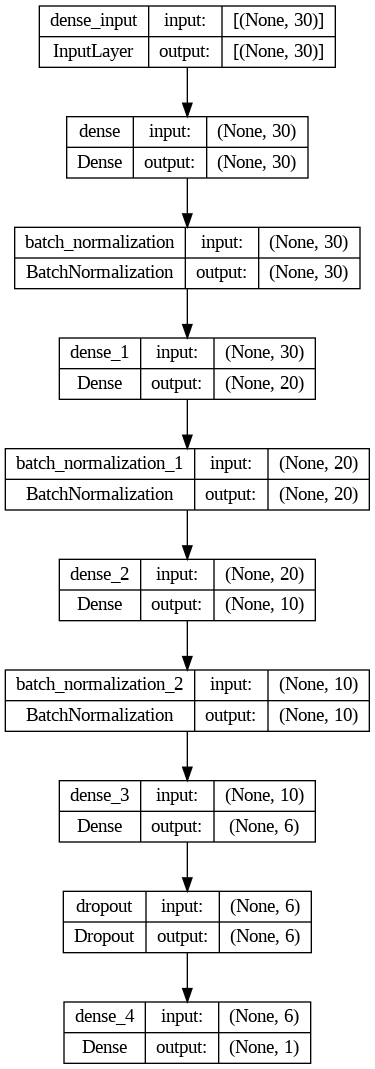

In [18]:
# plot_model(model=create_model(), to_file='NN.png')
plot_model(model=create_model(), to_file='NN.png', show_shapes=True)


In [19]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(model=create_model, epochs=1000, batch_size=8, verbose=1)))
pipeline = Pipeline(estimators)

In [20]:
kfold = StratifiedKFold(n_splits=4, shuffle=True)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)


Streaming output truncated to the last 5000 lines.
Epoch 503/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.2788 - accuracy: 0.8500
Epoch 504/1000
18/18 [==============================] - 0s 9ms/step - loss: 0.3186 - accuracy: 0.8857
Epoch 505/1000
18/18 [==============================] - 0s 9ms/step - loss: 0.2839 - accuracy: 0.8714
Epoch 506/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.4072 - accuracy: 0.8357
Epoch 507/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.2482 - accuracy: 0.9000
Epoch 508/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.3700 - accuracy: 0.8429
Epoch 509/1000
18/18 [==============================] - 0s 10ms/step - loss: 0.2928 - accuracy: 0.8786
Epoch 510/1000
18/18 [==============================] - 0s 11ms/step - loss: 0.3480 - accuracy: 0.8571
Epoch 511/1000
18/18 [==============================] - 0s 10ms/step - loss: 0.2809 - accuracy: 0.8714
Epoch 512/1000
18/18 [======

In [22]:
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Results: 74.90% (5.39%)
